In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import gwpy
from gwpy.timeseries import TimeSeries
from scipy.fft import fft, ifft

plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text', usetex=False)

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

In [8]:
times = np.arange(0.0, 1, 0.001)
plottimes = np.arange(0,1, 0.001)
noisetimes = np.arange(0.0, 1, 0.002)
#print(times)
print(np.shape(times))
print(np.shape(noisetimes))
print(np.shape(plottimes))

(1000,)
(500,)
(1000,)


# Noise


## Noise Function

In [9]:
def MakeGaussianNoise(amplitude, noisetimes):
    np.random.seed(19680801)
    mu, sigma = 0,0.1
    s = np.random.normal(mu, sigma, 10000)
    
    s1 = s * amplitude
    #count, bins, ignored = plt.hist(s1,30, density=True)
    indexes = np.random.random(np.shape(noisetimes))
    indexes = (indexes*1000)
    inds = []

    for i in indexes:
        ii = int(i)
        inds.append(ii)

    GaussianNoise = []
    for i in inds:
        noise = s1[i]
        GaussianNoise.append(noise)
    
    return GaussianNoise
    

#print((indexes))
    

# Simulated Signals

The potential signals that can be simulated to emulate possible gravitational wave detections for transient sources are Sine-Gaussian, Gaussian and Ring-down waveforms. 

Functions to simulate these signals will be defined below.

## Sine-Gaussian 

$$H_{+}(t) = exp(-t^{2}/\tau^{2})sin(2\pi f_{0}t)$$
$$H_{x}(t) = exp(-t^{2}/\tau^{2})cos(2\pi f_{0}t)$$

$$\tau = \frac{Q}{(\sqrt(2\pi f_{0}))}$$


In [10]:
def AddNoiseToSignal(signal, flag, noise): # this function returns the original signal with the noise added in, if flag is True signal added at every second point, if False signal added at every point
    signal_with_noise = []
    signal_with_noise.append(signal[0])
    for i in range(len(signal)):
        
        if flag == True:
            if i == 0:
                continue
            else:
                if (i%2) ==0:
                    s_w_n = signal[i]+noise[int[i/2]]
                else: 
                    s_w_n = signal[i]
                
                signal_with_noise.append(s_w_n)
        else:
            if i == 0:
                continue
            else:
                s_w_n = signal[i]+noise[i]
                signal_with_noise.append(s_w_n)
    
    return signal_with_noise

In [11]:
def plotsignals(times, sig_w_noise, sig, noise):
    import matplotlib.pyplot as plt
    fig, (ax1, ax2)= plt.subplots(1,2, figsize = (15,5))

    fig.suptitle('Sine-Gaussian Wave Packets')
    ax1.scatter(times, (sig_w_noise), c='thistle', s=0.1)
    ax1.plot(times,sig_w_noise, c='lightskyblue', label = 'Signal with Noise', linewidth=1)
    ax1.set_ylabel('Amplitude')
    ax1.set_xlabel('Time (s)')
    ax1.set_title('Q=9, f0=80, alpha=0.5')

    ax2.scatter(times, (sig), c='lightskyblue', s=0.1)
    ax2.plot(times,sig, c='lightskyblue', label='Signal', linewidth=1)
    ax2.scatter(noisetimes, noise, c = 'thistle', s=1, label='Noise')
    ax2.set_ylabel('Amplitude')
    ax2.set_xlabel('Time (s)')
    ax2.set_title('Q=100, f0=170, alpha=0.8')


    ax1.set_facecolor('black')
    ax2.set_facecolor('black')

    ax1.legend(labelcolor='linecolor', facecolor='black')
    ax2.legend(labelcolor='linecolor', facecolor='black')




In [13]:
def AddNoiseToSignal(signal, flag, noise): # this function returns the original signal with the noise added in, if flag is True signal added at every second point, if False signal added at every point
    signal_with_noise = []
   # signal_with_noise.append(signal[0])
    for i in range(len(signal)):
        
        if flag == True:
            if i == 0:
                s_w_n = noise[i]
            else:
                if (i%2) ==0:
                    s_w_n = signal[i]+noise[int[i/2]]
                else: 
                    s_w_n = signal[i]
                
                signal_with_noise.append(s_w_n)
        else:
          #  if i == 0:
            #    s_w_n = noise[i]
           # else:
            s_w_n = signal[i]+noise[i]
           # print(s_w_n)
            signal_with_noise.append(s_w_n)
          #  break
    
    return signal_with_noise

In [14]:
f_0SG = np.arange(70, 5000, 1)
QsSG = np.array([3,9,100])

def SG_tau(Q, f0):
    t = Q/(np.sqrt(2)*np.pi*f0)
    return t


def SG_H_plus(Q, f0, t, alpha):
    tau = SG_tau(Q,f0)
    print('tau = ',tau)
    print('f0 = ',f0)
    print('Q = ',Q)
    #print(np.exp((-t**2/tau**2)))
    #print(np.sin(2*np.pi*f0*t))
    v = 0.5
    H = np.sin(2*np.pi*f0*(v-t)) * np.exp(-((v-t)**2/tau**2)) 
    h = 0.02 * (((1+alpha**2)/2) * H)# + (alpha * H)
   # h[1500] = h[1500]+0.015
   # h[1480] = h[1480]+0.002
   # h[1520] = h[1520]+0.004
   # h[1550] = h[1550]+0.005
    plt.plot(t,h)
    return h


tau =  0.13239945825839794
f0 =  170
Q =  100
tau =  0.10230867229058024
f0 =  220
Q =  100
tau =  0.1184626731785666
f0 =  190
Q =  100
tau =  0.12504393279959805
f0 =  180
Q =  100
(10000,)


"\nnp.savetxt('./TranAD-main/data/MEG_SINE/135_UCR_Anomaly_InternalBleeding16_1200_4187_4199.txt', gauss_noise1)\nnp.savetxt('./TranAD-main/data/MEG_SINE/136_UCR_Anomaly_InternalBleeding17_1600_3198_3309.txt', gauss_noise2)\nnp.savetxt('./TranAD-main/data/MEG_SINE/137_UCR_Anomaly_InternalBleeding18_2300_4485_4587.txt', gauss_noise3)\nnp.savetxt('./TranAD-main/data/MEG_SINE/138_UCR_Anomaly_InternalBleeding19_3000_4187_4197.txt', gauss_noise4)\n\n\nnp.savetxt('./TranAD-main/data/MEG_TRIAL/1_MEGTRIAL_Anomaly_Gaussnoise_24_10_10.txt', noise1)\nnp.savetxt('./TranAD-main/data/MEG_TRIAL/2_MEGTRIAL_Anomaly_Gaussnoise_24_10_20.txt', sn2)\nnp.savetxt('./TranAD-main/data/MEG_TRIAL/3_MEGTRIAL_Anomaly_Gaussnoise_24_10_5.txt', noise3)\nnp.savetxt('./TranAD-main/data/MEG_TRIAL/4_MEGTRIAL_Anomaly_Gaussnoise_24_10_3.txt', noise4)\n\n"

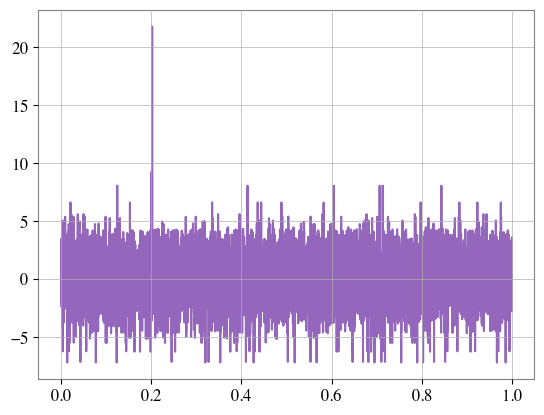

In [15]:
times = np.arange(0,1,0.0001)
SG1 = SG_H_plus(QsSG[2], f_0SG[100], times, 0.8)
SG2 = SG_H_plus(QsSG[2], f_0SG[150], times, 0.8)
SG3 = SG_H_plus(QsSG[2], f_0SG[120], times, 0.8)
SG4 = SG_H_plus(QsSG[2], f_0SG[110], times, 0.8)

noise1 = MakeGaussianNoise(20, times)
noise2 = MakeGaussianNoise(20,times)
noise3 = MakeGaussianNoise(7,times)
noise4 = MakeGaussianNoise(11, times)

sn1 = AddNoiseToSignal(SG1, False, noise1)
sn2 = AddNoiseToSignal(SG2, False, noise2)
sn3 = AddNoiseToSignal(SG3, False, noise3)
sn4 = AddNoiseToSignal(SG4, False, noise4)

sn2[2000] = sn2[2000]+10
sn2[2020] = sn2[2020]+20

plt.plot(times, sn2)
#SG2[1500] = SG2[1500]+0.02
    #else:
     #   print('False')

print(np.shape(SG4))

# 135_UCR_Anomaly_InternalBleeding16_1200_4187_4199
'''
np.savetxt('./TranAD-main/data/MEG_SINE/135_UCR_Anomaly_InternalBleeding16_1200_4187_4199.txt', gauss_noise1)
np.savetxt('./TranAD-main/data/MEG_SINE/136_UCR_Anomaly_InternalBleeding17_1600_3198_3309.txt', gauss_noise2)
np.savetxt('./TranAD-main/data/MEG_SINE/137_UCR_Anomaly_InternalBleeding18_2300_4485_4587.txt', gauss_noise3)
np.savetxt('./TranAD-main/data/MEG_SINE/138_UCR_Anomaly_InternalBleeding19_3000_4187_4197.txt', gauss_noise4)


np.savetxt('./TranAD-main/data/MEG_TRIAL/1_MEGTRIAL_Anomaly_Gaussnoise_24_10_10.txt', noise1)
np.savetxt('./TranAD-main/data/MEG_TRIAL/2_MEGTRIAL_Anomaly_Gaussnoise_24_10_20.txt', sn2)
np.savetxt('./TranAD-main/data/MEG_TRIAL/3_MEGTRIAL_Anomaly_Gaussnoise_24_10_5.txt', noise3)
np.savetxt('./TranAD-main/data/MEG_TRIAL/4_MEGTRIAL_Anomaly_Gaussnoise_24_10_3.txt', noise4)

'''

In [16]:
noisetimes = np.arange(0,1,0.0009765625)
np.random.seed(19680801)
mu, sigma = 0,0.1
s = np.random.normal(mu, sigma, 10000)
amplitude = 10
s1 = s *amplitude
#count, bins, ignored = plt.hist(s1,30, density=True)
indexes = np.random.random(np.shape(noisetimes))
indexes2 = np.random.random(np.shape(noisetimes))
indexes3 = np.random.random(np.shape(noisetimes))
indexes4 = np.random.random(np.shape(noisetimes))
indexes5 = np.random.random(np.shape(noisetimes))
indexes6 = np.random.random(np.shape(noisetimes))
indexes7 = np.random.random(np.shape(noisetimes))
indexes8 = np.random.random(np.shape(noisetimes))
indexes9 = np.random.random(np.shape(noisetimes))
indexes10 = np.random.random(np.shape(noisetimes))

indexes = (indexes*1000)
indexes2 = (indexes2*1000)
indexes3 = (indexes3*1000)
indexes4 = (indexes4*1000)
indexes5 = (indexes5*1000)
indexes6 = (indexes6*1000)
indexes7 = (indexes7*1000)
indexes8 = (indexes8*1000)
indexes9 = (indexes9*1000)
indexes10 = (indexes10*1000)

inds = []
inds2 = []
inds3 = []
inds4 = []
inds5 = []
inds6 = []
inds7 = []
inds8 = []
inds9 = []
inds10 = []

for i in indexes:
    ii = int(i)
    inds.append(ii)

for i in indexes2:
    ii = int(i)
    inds2.append(ii)

for i in indexes3:
    ii = int(i)
    inds3.append(ii)
    
for i in indexes4:
    ii = int(i)
    inds4.append(ii)
    
for i in indexes5:
    ii = int(i)
    inds5.append(ii)
    
for i in indexes6:
    ii = int(i)
    inds6.append(ii)
    
for i in indexes7:
    ii = int(i)
    inds7.append(ii)
    
for i in indexes8:
    ii = int(i)
    inds8.append(ii)
    
for i in indexes9:
    ii = int(i)
    inds9.append(ii)

for i in indexes10:
    ii = int(i)
    inds10.append(ii)

GaussianNoise = []
GaussianNoise2 = []
GaussianNoise3 = []
GaussianNoise4 = []
GaussianNoise5 = []
GaussianNoise6 = []
GaussianNoise7 = []
GaussianNoise8 = []
GaussianNoise9 = []
GaussianNoise10 = []

for i in inds:
    noise = s1[i]
    GaussianNoise.append(noise)

for i in inds2:
    noise = s1[i]
    GaussianNoise2.append(noise)

for i in inds3:
    noise = s1[i]
    GaussianNoise3.append(noise)

for i in inds4:
    noise = s1[i]
    GaussianNoise4.append(noise)

for i in inds5:
    noise = s1[i]
    GaussianNoise5.append(noise)

for i in inds6:
    noise = s1[i]
    GaussianNoise6.append(noise)

for i in inds7:
    noise = s1[i]
    GaussianNoise7.append(noise)

for i in inds8:
    noise = s1[i]
    GaussianNoise8.append(noise)

for i in inds9:
    noise = s1[i]
    GaussianNoise9.append(noise)

for i in inds10:
    noise = s1[i]
    GaussianNoise10.append(noise)

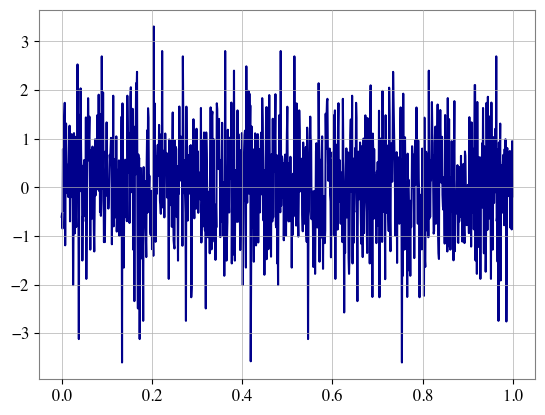

In [17]:
times = np.arange(0,1,0.0009765625)
noise1 = MakeGaussianNoise(20, times)
noise2 = MakeGaussianNoise(20,times)
#plt.plot(times, noise2)
plt.plot(times, GaussianNoise, c='darkblue')
plt.savefig('Gaussiannoise.pdf')
#plt.plot(times, GaussianNoise2)
#plt.plot(times, GaussianNoise3)
#plt.plot(times, GaussianNoise4)
#plt.plot(times, GaussianNoise5)
#plt.plot(times, GaussianNoise6)
#plt.plot(times, GaussianNose7)
#plt.plot(times, GaussianNoise8)
#plt.plot(times, GaussianNoise9)
#plt.plot(times, GaussianNoise10)

#print(np.shape(noise1))

In [18]:
np.savetxt('./data/GAUSS/train/1_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise)
np.savetxt('./data/GAUSS/train/2_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise2)
np.savetxt('./data/GAUSS/train/3_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise3)
np.savetxt('./data/GAUSS/train/4_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise4)
np.savetxt('./data/GAUSS/train/5_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise5)
np.savetxt('./data/GAUSS/train/6_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise6)
np.savetxt('./data/GAUSS/train/7_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise7)
np.savetxt('./data/GAUSS/train/8_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise8)
np.savetxt('./data/GAUSS/train/9_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise9)
#np.savetxt('./data/GAUSS/train/10_GAUSS_Anomaly_Gaussnoise_train.txt', GaussianNoise10)


tau =  0.021035427947595938
f0 =  1070
Q =  100


NameError: name 'SG6' is not defined

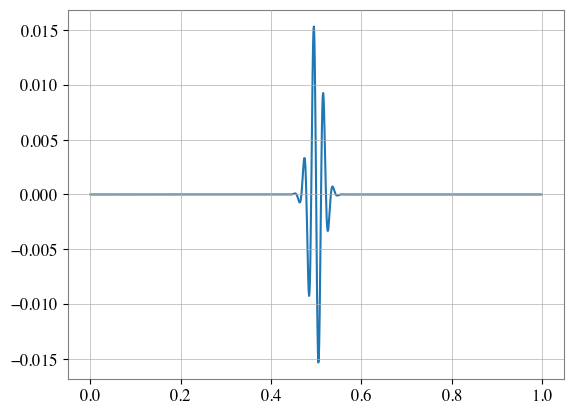

In [19]:
SG1 = SG_H_plus(QsSG[2], f_0SG[1000], times, 0.8)

SG1 = SG1 * 500
SG2 = SG1 * 5
SG3 = SG1 * 3
SG4 = SG1 * 7
SG5 = SG1 * 2
SG6 = SG1 * 15
SG7 = SG1 * 0.5
SG8 = SG1 * 0.7
SG9 = SG1 * 1.2

sn1 = AddNoiseToSignal(SG1, False, GaussianNoise10)
sn2 = AddNoiseToSignal(SG2, False, GaussianNoise10)
sn3 = AddNoiseToSignal(SG3, False, GaussianNoise10)
sn4 = AddNoiseToSignal(SG4, False, GaussianNoise10)
sn5 = AddNoiseToSignal(SG5, False, GaussianNoise10)
sn6 = AddNoiseToSignal(SG6, False, GaussianNoise10)
sn7 = AddNoiseToSignal(SG7, False, GaussianNoise10)
sn8 = AddNoiseToSignal(SG8, False, GaussianNoise10)
sn9 = AddNoiseToSignal(SG9, False, GaussianNoise10)


GaussianNoise2[800] = GaussianNoise2[800]+10
plt.plot(times, sn4)
print(np.shape(sn1))
np.savetxt('./data/GAUSS/test/1_GAUSS_Anomaly_Gaussnoise_test.txt', sn1)
np.savetxt('./data/GAUSS/test/2_GAUSS_Anomaly_Gaussnoise_test.txt', sn2)
np.savetxt('./data/GAUSS/test/3_GAUSS_Anomaly_Gaussnoise_test.txt', sn3)
np.savetxt('./data/GAUSS/test/4_GAUSS_Anomaly_Gaussnoise_test.txt', sn4)
np.savetxt('./data/GAUSS/test/5_GAUSS_Anomaly_Gaussnoise_test.txt', sn5)
np.savetxt('./data/GAUSS/test/6_GAUSS_Anomaly_Gaussnoise_test.txt', sn6)
np.savetxt('./data/GAUSS/test/7_GAUSS_Anomaly_Gaussnoise_test.txt', sn7)
np.savetxt('./data/GAUSS/test/8_GAUSS_Anomaly_Gaussnoise_test.txt', sn8)
np.savetxt('./data/GAUSS/test/9_GAUSS_Anomaly_Gaussnoise_test.txt', sn9)



ValueError: x and y must have same first dimension, but have shapes (1024,) and (10000,)

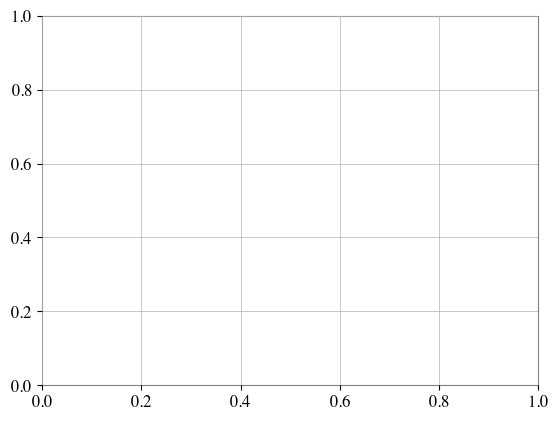

In [20]:
plt.plot(times, sn1)
plt.plot(times, sn2)
plt.plot(times, sn3)
plt.plot(times, sn4)
plt.plot(times, sn5)

In [4]:
labels2 = np.zeros((1024,1))
labels = np.zeros((1024, 1))
#labels[800] = 1
print(labels2[799:802])
a = np.shape(labels)
print(a)
np.save('./data/GAUSS/labels/1_GAUSS_Anomaly_labels.npy', labels)
np.save('./data/GAUSS/labels/2_GAUSS_Anomaly_labels.npy', labels)
np.save('./data/GAUSS/labels/3_GAUSS_Anomaly_labels.npy', labels)
np.save('./data/GAUSS/labels/4_GAUSS_Anomaly_labels.npy', labels)
np.save('./data/GAUSS/labels/5_GAUSS_Anomaly_labels.npy', labels)
np.save('./data/GAUSS/labels/6_GAUSS_Anomaly_labels.npy', labels)
np.save('./data/GAUSS/labels/7_GAUSS_Anomaly_labels.npy', labels)
np.save('./data/GAUSS/labels/8_GAUSS_Anomaly_labels.npy', labels)
np.save('./data/GAUSS/labels/9_GAUSS_Anomaly_labels.npy', labels)


[[0.]
 [0.]
 [0.]]
(1024, 1)
